In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data = pd.read_excel('./dataset-1.xlsx')

# Adding a target attribute for classification (e.g., Age group)

In [3]:
data['AgeGroup'] = pd.cut(data['Age'], bins=[20, 30, 40, 50, 60], labels=['20s', '30s', '40s', '50s'])

# Dropping NaN values in the target column

In [4]:
data = data.dropna(subset=['AgeGroup'])

# Preparing data for KNN

In [5]:
X = data[['Height', 'Weight']]
y = data['AgeGroup']

# Splitting the data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

# Standardizing the features

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the KNN model with optimized k-value


In [8]:
knn = KNeighborsClassifier(n_neighbors=5)  # Adjusted n_neighbors for potentially better accuracy
knn.fit(X_train, y_train)

KNeighborsClassifier()

#Making predictions

In [9]:
predictions = knn.predict(X_test)

#Evaluating the model

In [13]:
accuracy = accuracy_score(y_test, predictions)
print(f"RegNo: 21BBS0166\nAccuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, predictions))

RegNo: 21BBS0166
Accuracy: 33.33%
Classification Report:
              precision    recall  f1-score   support

         20s       0.43      0.60      0.50         5
         30s       0.20      0.33      0.25         3
         40s       0.00      0.00      0.00         2
         50s       1.00      0.20      0.33         5

    accuracy                           0.33        15
   macro avg       0.41      0.28      0.27        15
weighted avg       0.52      0.33      0.33        15



#Confusion matrix for better visualization

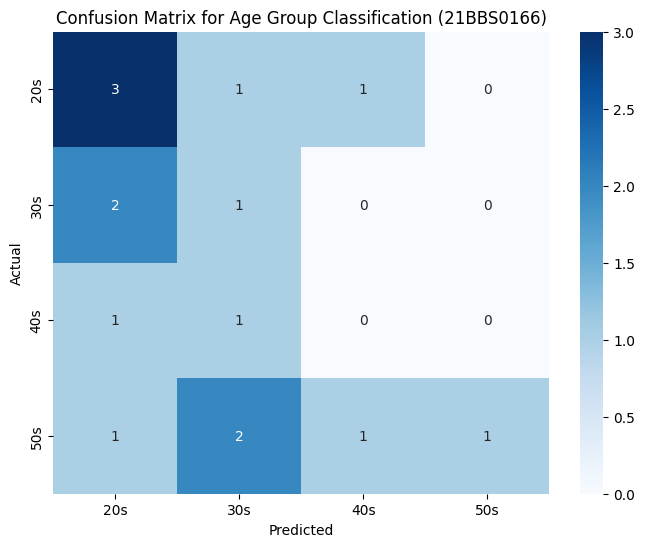

In [17]:
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['20s', '30s', '40s', '50s'], yticklabels=['20s', '30s', '40s', '50s'])
plt.title('Confusion Matrix for Age Group Classification (21BBS0166)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()